In [1]:
%%html
<script src="https://kit.fontawesome.com/751ade44c1.js" crossorigin="anonymous"></script>

<style>
:root {
    --red: #d9534f;
    --yellow: #f0ad4e;
    --green: #5cb85c;
    --blue: #0275d8;
    --light-blue: #5bc0de;
    --dark-blue: #073b4c;
    --purple: #6A4C93;
}
    
.important {
    color: var(--yellow);
}

.optional {
    color: var(--green);
}
</style>


# <i class="fas fa-circle exercise"></i> Geometric transformations
<span class="badge badge-pill badge-warning">exercise</span><span class="badge badge-pill badge-dark">notebook</span>


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np



## Geometric Transformations

In this exercise, you will create matrices and apply linear geometric transformations in vectors and points on the
homogeneous and Euclidean coordinate systems. We cover the following topics:

* Rotations and translations using homogeneous coordinates.
* Bases and transforming points between them.


We use the following helper functions for making the visualisation easier. Feel free to study the code:


In [2]:
def config_plot(title, data, data_type):
    """Setup plot layout. This is purely for making the plots easier to read.
    
    The details are not important for understanding the course material.
    """
    rows, cols = data.shape
    
    plt.title(title)
    plt.grid(b=True, which="major")
    plt.legend([f'{data_type}{i+1}' for i in range(cols)])
    plt.axis('scaled')
    plt.plot(0, 0, "ok")

    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    
    max_values = 1.3 * np.max(abs(data.T), axis = 0)
    plt.xlim([-max_values[0], max_values[0]])
    plt.ylim([-max_values[1], max_values[1]])
    
    plt.show()

def show_vectors(vectors, title="Vectors", origin=(0, 0)):
    """Helper that displays vectors using Matplotlib. 
    
    The details are not important for understanding the course material."""
    rows, cols = vectors.shape

    for i in range(0, cols):
        xs = [origin[0], vectors[0, i]]
        ys = [origin[1], vectors[1, i]]
        plt.plot(xs, ys, "-", linewidth=2)
    
    config_plot(title, vectors, 'v')

def show_points(points, title="Points"):
    """Helper that displays points using Matplotlib. 
    
    The details are not important for understanding the course material."""
    rows, cols = points.shape

    for i in range(0, cols):
        xs = points[0, i]
        ys = points[1, i]
        plt.plot(xs, ys, "o", linewidth=2)
    
    config_plot(title, points, 'p')


The rotation matrix ($R$) in two dimensions is given by:

$$R = \left[
	\begin{array}{r r}
		\cos(\theta) & -\sin(\theta)\\
		\sin(\theta) & \cos(\theta)
	\end{array}
\right],$$

where $\theta$ is the rotation angle around the origin $(0, 0)$.

### <i class="fas fa-thermometer-quarter important"></i> Task (A)
1. **Create rotation matrices:** Implement the function `get_2d_rotation_matrix()` below which, given an input angle
`theta` (in radians) returns the rotation matrix `R`:


In [3]:
def get_2d_rotation_matrix(theta):
    """Return a rotation matrix for the specified input angle theta."""
    ...


2. **Test the function:** Test your function by multiplying the rotation matrix with the vector $[0, 1]^T$ for the
following values of $\theta$: $0, \pi/2, \pi, 1.5\pi, 2\pi$. Print the results.


In [4]:
angles = [math.pi/2, math.pi, 3*math.pi/2, 2/math.pi]
vector = np.array([[0], [1]])

# Your code here:


[[-1.000000e+00]
 [ 6.123234e-17]]
[[-1.2246468e-16]
 [-1.0000000e+00]]
[[ 1.0000000e+00]
 [-1.8369702e-16]]
[[-0.59448077]
 [ 0.80410983]]


3. **Rotate multiple vectors:** Rotate the vectors in `V1` by using matrix multiplication. Show both the original and
transformed vectors using the `show_vectors` function.


/var/folders/sm/rn2g05b922q4jf6ttn9x3jzw0000gn/T/ipykernel_18125/3024245951.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


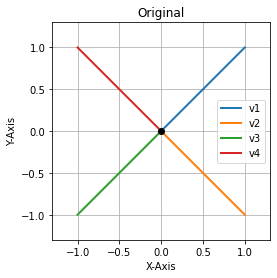

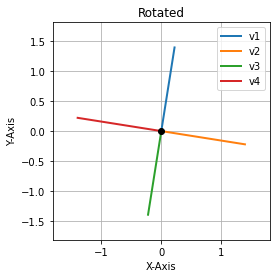

In [5]:
R = get_2d_rotation_matrix(math.pi/5) # Get rotation matrix
# Create matrix of sample vectors
V1 = np.array([[ 1,  1, -1 ,-1 ],
               [ 1, -1, -1,  1 ]], dtype=np.float64)

# Your code here:


### Manual translation
<i class="fas fa-thermometer-quarter optional"></i>
Translate the points in `p1` manually, by adding the translation $(-2, -1)$ to them. *Hint: Use broadcasting for the
translation.*


/var/folders/sm/rn2g05b922q4jf6ttn9x3jzw0000gn/T/ipykernel_18125/3024245951.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


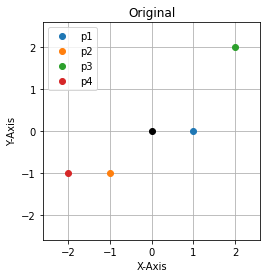

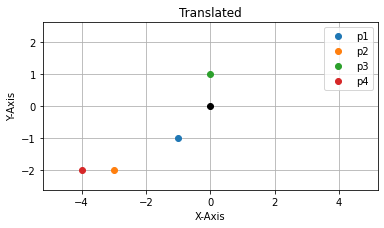

In [6]:
# Test points
p1 = np.array([[ 1, -1, 2, -2 ],
               [ 0, -1, 2, -1 ]], dtype=np.float64)
# Translation vector
t = np.array([[-2], [-1]], dtype=np.float64)

# Your code here:


## Homogeneous coordinates
In this exercise, you will implement rotations and translations using affine transformations.

An general affine transformation matrix for rotation and translation in 2d is defined as:

$$
T=\begin{bmatrix}\cos\theta&-\sin\theta & x_t\\\sin\theta& \cos\theta & y_t\\ 0&0&1\end{bmatrix}
$$

The transformation is then applied using the following calcuation

$$
\begin{bmatrix}x'\\ y'\\1\end{bmatrix} = T\begin{bmatrix}x\\ y\\1\end{bmatrix}.
$$

Affine transformations necessitate the use of homogeneous coordinates to be used with generic matrix multiplication
methods. We therefore define the functions `to_homogeneous` and `to_euclidean` for easy conversion to and from
homogeneous coordinates.

### <i class="fas fa-thermometer-half important"></i> Task(B)
1. Study the functions `to_homogeneous` and `to_euclidean` below. You will use them in the exercises to come.


In [7]:
def to_homogeneous(points):
    """Transform points to homogeneus coordinates."""
    return np.vstack((points, np.ones((1, points.shape[1]))))

def to_euclidean(points):
    """Transform homogeneus points to euclidean points."""
    return points[:2] / points[2]


2. Implement the function `get_2d_rt_matrix`. It should return an affine transformation matrix given a rotation
`theta` and translation tuple `t`.


In [8]:
def get_2d_rt_matrix(theta, t):
    """Combines a rotation by angle theta and a translation by t=(x, y). 
    Returns the resulting transformation matrix."""
    ...


3. **Transform points:** Transform the points in `p1` using `get_2d_rt_matrix`. Remember to convert the points to
homogeneous coordinates. Experiment with different values of `theta` and `t`. In what order are the translation and
rotation performed?


/var/folders/sm/rn2g05b922q4jf6ttn9x3jzw0000gn/T/ipykernel_18125/3024245951.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


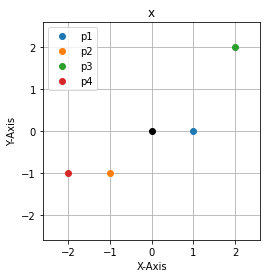

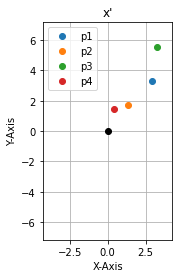

In [9]:
# Your code here:
xm = ...

# Show the points for testing
show_points(p1, "x")
show_points(xm, "x'")


4. **Combine multiple transformations:** Do a translation followed by a rotation by creating two separate transformation
matrices and combining them using the equation $T_{final} = T_{last}T_{first}$. Transform the points in `p1` using the
new matrix.


/var/folders/sm/rn2g05b922q4jf6ttn9x3jzw0000gn/T/ipykernel_18125/3024245951.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


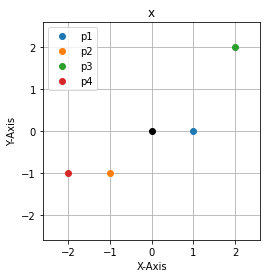

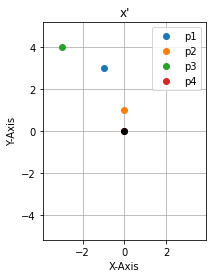

In [10]:
# Your code here:

# For testing
show_points(p1, "x")
show_points(xm, "x'")


## Change of basis
In this exercise, you will apply a change of basis in homogeneous coordinate systems.

![coordinate system](images/coordinateSystems.png)

The image above shows two coordinate systems: 
* $A$ which is defined by the unit vectors $\binom{0}{1}, \binom{1}{0}$.
* $B$ which is translated by $(7, 5)$ and rotated $50^\circ$ with respect to $A$.

In the following, you will transform points from $A$ to $B$ and back using the change of basis formula.
The matrix representing the change of basis transformation is defined as $T^A_B=V_B^{-1}V_A$, where $V_B, V_A$ are the
basis vectors of $A$ and $B$ respectively. Since $A=I$ in our case, $T^A_B=V_B^{-1}$. $V_B$ is defined by the affine
transformation matrix that performs the translation and rotation mentioned above.

### <i class="fas fa-thermometer-quarter important"></i> Task (C)
1. **Create change of basis transformation:** 
Create an affine matrix `TAB` which maps a point from coordinate system $A$ to $B$ using the definitions above.


In [11]:
t = (7, 5) # Translation
theta = (50 * math.pi) / 180. # Rotation

# Your code here:


3. **Transform vectors:** Map the vectors defined by `vA` in coordinate system $A$ to coordinate system $B$ using the
same method as the last exercise. Save the points as `vB`. Is the result what you expected? It might help to imagine
the plots laid over the original plot above.


/var/folders/sm/rn2g05b922q4jf6ttn9x3jzw0000gn/T/ipykernel_18125/3024245951.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major")


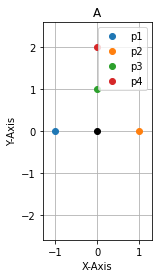

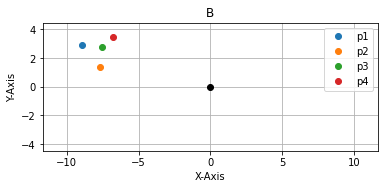

In [15]:
vA = np.array([[ -1, 1, 0, 0 ],
               [  0, 0, 1, 2 ]], dtype=np.float64)
# Your code here:
# Testing
show_points(vA, "A")
show_points(vB, "B")
plt.show()


4. **Inverse mapping:** Create the affine matrix `TBA` which maps a point from coordinate system $B$ to $A$ using the
definitions above. Use it to transform the points `vB` back to $A$ - save the result in `vA2`. *Hint: You may
create `TBA` either from scratch or from `TAB`.*


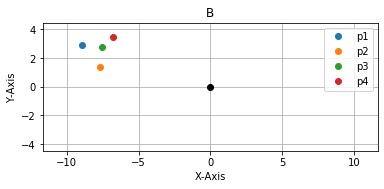

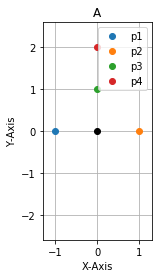

In [13]:
# Your code here:

# Testing
show_points(vB, "B")
show_points(vA2, "A")
plt.show()
